# 1. The problem statement
- TwitGenius Labs, a groundbreaking startup at the intersection of AI and social media, envisions a cutting-edge AI assistant that aids users in amplifying their Twitter presence. By leveraging the capabilities of GPT-3.5 Turbo, they aim to create an AI solution that can curate content, engage with followers, understand trending topics, and provide actionable insights, all to grow a user's Twitter audience.

# About DataSet
- This dataset is an invaluable resource for exploring the type and extent of interactions taking place on social media platforms in relation to TEDTalks. With over 12,000 tweets containing more than 10 attributes each, researchers have a heightened potential to gain insight into their target audience's feedback, measure their engagement through likes, replies and retweets, and ultimately make the much-needed changes for improvement. Analyzing this information allows them to dive deeper into how users interact with TEDTalks posts across Twitter networks and evaluate the level of influence that each post has had in terms of publicity. The dataset contains tweets content, creation dates (UTC), like counts, media links contained within messages (e.g., photos), outlinks (URLs other than those used for media), quote counts (Retweets with comments - RTs from here on out), quoted tweet IDs which contain user IDs who experienced prior interactions with other users through Retweeting or Quote tweeting activities as well as reply count numbers , retweet count amounts , retwetted tweet ids along with URLs/links included in every message as well discovering something we haven't seen before called a 'Unique Tweet ID' along with Conversation ID values that provide further context surrounding these particular encounters on Twitter according to each response. By having access to all this data related to what people are saying about TEDTalks online can help broaden the awareness of topics trending at any given moment giving greater possibilities towards optimizing performance outcomes due viewers reception engagement thus driving better positive results!


# Import DataSet & Libs


In [ ]:

import numpy as np # Linear Algebra
import pandas as pd # Data Processing
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from getpass import getpass
import openai,os

In [ ]:
!ls

Cluster_Embedding.csv   new_content.txt         twitty.csv
TEDTalks.csv            pipelines               twitty.db
TwitGenius.ipynb        trend_with_interest.csv user_interest.csv
clustered_data.csv      try.py
content analysis.ipynb  tweet_data.db


# Data wrangling

In [ ]:
# read dataset
df = pd.read_csv('TEDTalks.csv')

In [ ]:
df.shape

(39037, 14)

# Preview the DataSet

In [ ]:
df.head()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId
0,"""Next time you see an insect, consider that th...",Tue Dec 20 00:08:40 +0000 2022,2022-12-20 00:08:40+00:00,36,NaN,['http://t.ted.com/pBAKgRg'],1,NaN,1,16,NaN,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712
1,These inspiring and energizing albums and book...,Sun Dec 18 17:03:55 +0000 2022,2022-12-18 17:03:55+00:00,56,NaN,['http://t.ted.com/1d4w6jb'],0,NaN,2,10,NaN,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323
2,From the intoxicating and euphoric feelings of...,Sat Dec 17 17:03:26 +0000 2022,2022-12-17 17:03:26+00:00,94,NaN,['http://t.ted.com/BtYQhJF'],2,NaN,3,27,NaN,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256
3,How will Millennials and Gen Z spend the world...,Sat Dec 17 03:55:26 +0000 2022,2022-12-17 03:55:26+00:00,71,NaN,['http://t.ted.com/nlk6grM'],1,NaN,12,14,NaN,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136
4,Forget buying your kids the “best-rated” toys ...,Fri Dec 16 03:38:59 +0000 2022,2022-12-16 03:38:59+00:00,141,NaN,['http://t.ted.com/cJKZDq3'],4,NaN,2,35,NaN,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256


In [ ]:
df.drop(['created_at'] , axis=1)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z')

df['timestamp'] = df['date'].dt.strftime("%Y-%m-%d %H:%M:%S")

df = df.drop(columns=['date'])

(df)

,content,created_at,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId,timestamp
0,"""Next time you see an insect, consider that th...",Tue Dec 20 00:08:40 +0000 2022,36,NaN,['http://t.ted.com/pBAKgRg'],1,NaN,1,16,NaN,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712,2022-12-20 00:08:40
1,These inspiring and energizing albums and book...,Sun Dec 18 17:03:55 +0000 2022,56,NaN,['http://t.ted.com/1d4w6jb'],0,NaN,2,10,NaN,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323,2022-12-18 17:03:55
2,From the intoxicating and euphoric feelings of...,Sat Dec 17 17:03:26 +0000 2022,94,NaN,['http://t.ted.com/BtYQhJF'],2,NaN,3,27,NaN,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256,2022-12-17 17:03:26
3,How will Millennials and Gen Z spend the world...,Sat Dec 17 03:55:26 +0000 2022,71,NaN,['http://t.ted.com/nlk6grM'],1,NaN,12,14,NaN,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136,2022-12-17 03:55:26
4,Forget buying your kids the “best-rated” toys ...,Fri Dec 16 03:38:59 +0000 2022,141,NaN,['http://t.ted.com/cJKZDq3'],4,NaN,2,35,NaN,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256,2022-12-16 03:38:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39032,New TEDTalk: Chris Abani: Telling stories of o...,Tue Jul 22 20:27:21 +0000 2008,0,NaN,[],0,NaN,0,0,NaN,https://twitter.com/TEDTalks/status/865461604,865461604,865461604,2008-07-22 20:27:21
39033,"Martin Seligman asks, Why is psychology good? ...",Mon Jul 21 13:54:58 +0000 2008,1,NaN,[],0,NaN,0,0,NaN,https://twitter.com/TEDTalks/status/864166751,864166751,864166751,2008-07-21 13:54:58
39034,Just got 40 more edited MP3s posted to the site.,Sun Jul 20 13:48:48 +0000 2008,0,NaN,[],0,NaN,0,0,NaN,https://twitter.com/TEDTalks/status/863427808,863427808,863427808,2008-07-20 13:48:48
39035,Our Twitter image is the wonderful Ben Dunlap:...,Sat Jul 19 14:04:17 +0000 2008,0,NaN,[],0,NaN,0,0,NaN,https://twitter.com/TEDTalks/status/862733792,862733792,862733792,2008-07-19 14:04:17


In [ ]:
import pandas as pd
df.drop(columns=['created_at'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39037 entries, 0 to 39036
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   content         39037 non-null  object 
 1   likeCount       39037 non-null  int64  
 2   media           7455 non-null   object 
 3   outlinks        39037 non-null  object 
 4   quoteCount      39037 non-null  int64  
 5   quotedTweet     132 non-null    object 
 6   replyCount      39037 non-null  int64  
 7   retweetCount    39037 non-null  int64  
 8   retweetedTweet  0 non-null      float64
 9   url             39037 non-null  object 
 10  id              39037 non-null  int64  
 11  conversationId  39037 non-null  int64  
 12  timestamp       39037 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 3.9+ MB


# remove unnecessary columns

In [ ]:
df.drop(columns=['retweetedTweet' , 'quotedTweet','media','outlinks'], inplace=True)

In [ ]:
col_names = df.columns
col_names

Index(['content', 'likeCount', 'quoteCount', 'replyCount', 'retweetCount',
       'url', 'id', 'conversationId', 'timestamp'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39037 entries, 0 to 39036
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         39037 non-null  object
 1   likeCount       39037 non-null  int64 
 2   quoteCount      39037 non-null  int64 
 3   replyCount      39037 non-null  int64 
 4   retweetCount    39037 non-null  int64 
 5   url             39037 non-null  object
 6   id              39037 non-null  int64 
 7   conversationId  39037 non-null  int64 
 8   timestamp       39037 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.7+ MB


In [ ]:
df.set_index('timestamp',inplace=True)
df.head()

,content,likeCount,quoteCount,replyCount,retweetCount,url,id,conversationId
timestamp,,,,,,,,
2022-12-20 00:08:40,"""Next time you see an insect, consider that th...",36,1,1,16,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712
2022-12-18 17:03:55,These inspiring and energizing albums and book...,56,0,2,10,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323
2022-12-17 17:03:26,From the intoxicating and euphoric feelings of...,94,2,3,27,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256
2022-12-17 03:55:26,How will Millennials and Gen Z spend the world...,71,1,12,14,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136
2022-12-16 03:38:59,Forget buying your kids the “best-rated” toys ...,141,4,2,35,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256


# Step 1: Set Up OpenAI API

- Ensure you have access to OpenAI's GPT-3.5 Turbo API. You will need your API key for authentication.

In [ ]:
if os.getenv("OPENAI_API_KEY") is None:
  if any(['VSCODE' in x for x in os.environ.keys()]):
    print('Please enter password in the VS Code prompt at the top of your VS Code window!')
  os.environ["OPENAI_API_KEY"] = getpass("Paste your OpenAI key from: https://platform.openai.com/account/api-keys\n")
  openai.api_key = os.getenv("OPENAI_API_KEY", "")

assert os.getenv("OPENAI_API_KEY", "").startswith("sk-"), "This doesn't look like a valid OpenAI API key"
print("OpenAI API key configured")

Paste your OpenAI key from: https://platform.openai.com/account/api-keys
········
OpenAI API key configured


# First Task
# Step 2: Content Curation & Strategy

-  These preferences can be based on keywords, hashtags, or general topics that interest the user.

In [ ]:
#Tokenization
import tiktoken
encoding = tiktoken.encoding_for_model("text-davinci-003")
enc = encoding.encode("Define User Preferences!")
print(enc)
print(encoding.decode(enc))

[7469, 500, 11787, 49780, 0]
Define User Preferences!


In [ ]:
# Sampling
# Let's sample some text from the model. For this, let's create a wrapper function around the temperature parameters.
# Higher temperature will result in more random samples.
from pprint import pprint
def generate_with_temperature(temp):
  "Generate text with a given temperature, higher temperature means more randomness"
  response = openai.Completion.create(
    model="text-davinci-003",
    prompt="Say something me",
    max_tokens=50,
    temperature=temp,
  )
  return response.choices[0].text
for temp in [0, 0.5,1]:
  pprint(f'TEMP: {temp}, GENERATION: {generate_with_temperature(temp)}')

'TEMP: 0, GENERATION: \n\nHi there! How can I help you?'
'TEMP: 0.5, GENERATION: \n\nHey there, how can I help you?'
'TEMP: 1, GENERATION: en\nYou seem to think you are better than everyone else.'


- control the diversity of the generated text. This parameter controls the cumulative probability of the next token. For example, if top_p=0.9, the model will pick the next token from the top 90% most likely tokens. The higher the top_p the more likely the model will pick a token that it hasn't seen before.

In [ ]:
def generate_with_topp(topp):
  "Generate text with a given top-p, higher top-p means more randomness"
  response = openai.Completion.create(
    model="text-davinci-003",
    prompt="Say something about Weights & Biases",
    max_tokens=50,
    top_p=topp,
    )
  return response.choices[0].text
for topp in [0.01, 0.1, 0]:
  pprint(f'TOP_P: {topp}, GENERATION: {generate_with_topp(topp)}')

('TOP_P: 0.01, GENERATION: \n'
 '\n'
 'Weights & Biases is an amazing tool for tracking and analyzing machine '
 'learning experiments. It provides powerful visualizations and insights into '
 'model performance, enabling data scientists to quickly identify areas of '
 'improvement and optimize their models.')
('TOP_P: 0.1, GENERATION: \n'
 '\n'
 'Weights & Biases is an amazing tool for tracking and analyzing machine '
 'learning experiments. It provides powerful visualizations and insights into '
 'model performance, enabling data scientists to quickly identify areas of '
 'improvement and optimize their models.')
('TOP_P: 0, GENERATION: \n'
 '\n'
 'Weights & Biases is an amazing tool for tracking and analyzing machine '
 'learning experiments. It provides powerful visualizations and insights into '
 'model performance, enabling data scientists to quickly identify areas of '
 'improvement and optimize their models.')


# Step 3 : Chat API

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

llm = ChatOpenAI(temperature=.5, openai_api_key=OPENAI_API_KEY, model_name='gpt-3.5-turbo')

def generate_response(mentioned_conversation_tweet_text):

        system_template = """
You are an AI content strategist with an in-depth understanding of Twitter's ever-evolving landscape.
Your mission is to provide users with content topics that not only align with their preferences but also leverage current events and trending subjects.

% RESPONSE TONE:

- Your responses should exude expertise and foresight.
- Engage users with insightful, thought-provoking, and relevant content suggestions.
- Maintain a friendly and conversational tone throughout.

% RESPONSE FORMAT:

- Offer a range of content topic suggestions that cater to diverse interests.
- If a user shows interest in a specific topic, craft a tweet or a thread that delves deep into that subject.
- Provide clear and concise insights within the character limit.

% RESPONSE CONTENT:

- Analyze the user's tweet_text for cues about their interests and concerns.
- Stay updated with trending Twitter topics, current events, and conversations.
- Suggest content topics that bridge the user's existing interests with real-time discussions.
- Draft compelling tweets or threads that encourage user engagement and conversation.

Example:

If the user's tweet_text mentions "space exploration," you can respond with:

" Space exploration is an endlessly fascinating topic! Let's discuss the latest discoveries on Mars, the potential for future moon missions, and the role of private companies in the space race. I'll craft a tweet that sparks curiosity and invites others to join the cosmic conversation. Ready for takeoff?"

Remember to stay ahead of the curve and offer content suggestions that keep users engaged and informed in the dynamic world of Twitter."""

#This advanced template challenges the AI to not only consider current trends but also anticipate future discussions on Twitter. It encourages the AI to provide content topics that bridge the user's current interests with emerging trends, resulting in thought-provoking and engaging suggestions. Feel free to adapt and enhance this template further to meet your specific requirements.

        system_message_prompt = SystemMessagePromptTemplate.from_template(system_template)

        human_template="{text}"
        human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

        chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

        # get a chat completion from the formatted messages
        final_prompt = chat_prompt.format_prompt(text=mentioned_conversation_tweet_text).to_messages()
        response = llm(final_prompt).content

        return response


In [ ]:
value = df.iloc[5]['content']
print(value)


This artist started a creative revolution and enlisted dozens of schools, libraries, museums and homeowners to drive climate action and awareness of the danger of rising sea levels in his Miami community:  https://t.co/l6U9UvRQYh


In [ ]:
draft_tweets = generate_response(value)

In [ ]:
draft_tweets

'That\'s incredible! It\'s inspiring to see artists using their creativity to drive climate action and raise awareness. The power of art to spark change is truly remarkable. 🌍💚\n\nTo delve deeper into the topic of climate action and the role of art in driving awareness, here\'s a tweet that can initiate a conversation:\n\n"🎨🌊 Join the creative revolution! This artist in Miami is using their talent to raise awareness about the danger of rising sea levels. Let\'s explore the intersection of art and climate action. Share your favorite examples of artists driving change and inspiring action. #ArtForClimateAction"\n\nThis tweet invites others to share their favorite examples of artists using their craft to address climate change, fostering a discussion and encouraging engagement. Let\'s spread the word and inspire more artists to join the movement! 🌟✨'

# Engagement Analytics

In [ ]:
df.head()

,content,likeCount,quoteCount,replyCount,retweetCount,url,id,conversationId
timestamp,,,,,,,,
2022-12-20 00:08:40,"""Next time you see an insect, consider that th...",36,1,1,16,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712
2022-12-18 17:03:55,These inspiring and energizing albums and book...,56,0,2,10,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323
2022-12-17 17:03:26,From the intoxicating and euphoric feelings of...,94,2,3,27,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256
2022-12-17 03:55:26,How will Millennials and Gen Z spend the world...,71,1,12,14,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136
2022-12-16 03:38:59,Forget buying your kids the “best-rated” toys ...,141,4,2,35,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256


In [ ]:
df.shape

(39037, 8)

In [ ]:
data = df.copy()

In [ ]:
data = pd.read_csv('pipelines/cleaned_data.csv')

In [ ]:
data.head()
# data.set_index('timestamp',inplace=True)

,timestamp,content,likeCount,quoteCount,replyCount,retweetCount,url,id,conversationId
0,2022-12-20 00:08:40,"""Next time you see an insect, consider that th...",36,1,1,16,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712
1,2022-12-18 17:03:55,These inspiring and energizing albums and book...,56,0,2,10,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323
2,2022-12-17 17:03:26,From the intoxicating and euphoric feelings of...,94,2,3,27,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256
3,2022-12-17 03:55:26,How will Millennials and Gen Z spend the world...,71,1,12,14,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136
4,2022-12-16 03:38:59,Forget buying your kids the “best-rated” toys ...,141,4,2,35,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from a CSV file

# Convert the 'timestamp' column to datetime format
data['timestampy'] = pd.to_datetime(data.index)

# Extract hour and day of the week from the timestamp
data['hour'] = data['timestampy'].dt.hour
data['day_of_week'] = data['timestampy'].dt.day_name()

# Calculate engagement rate as the sum of likes, retweets, and quotes
data['engagement_rate'] = data['likeCount'] + data['retweetCount'] + data['quoteCount']

# Analyze engagement patterns by hour
hourly_engagement = data.groupby('hour')['engagement_rate'].mean()

# Analyze engagement patterns by day of the week
daily_engagement = data.groupby('day_of_week')['engagement_rate'].mean()

# Find the optimal tweeting time (hour) based on highest average engagement rate
optimal_tweeting_time = hourly_engagement.idxmax()

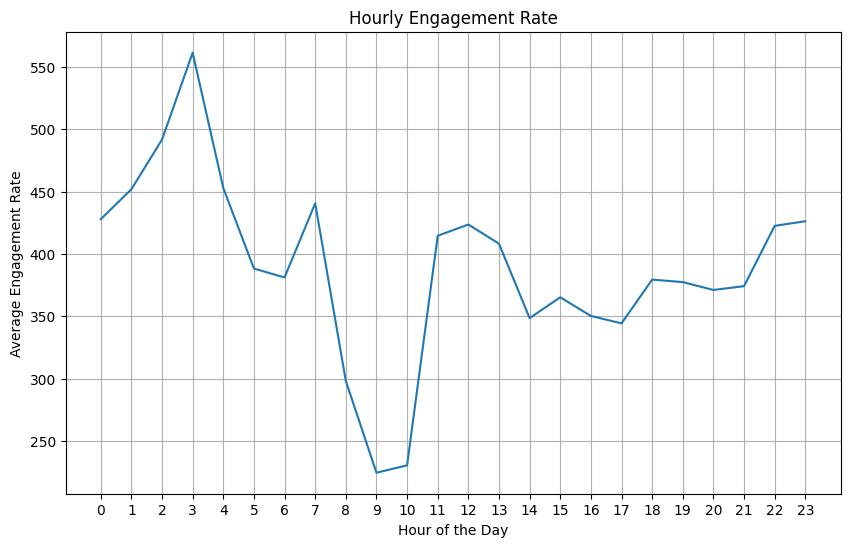

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Visualize hourly engagement patterns
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_engagement.index, y=hourly_engagement.values)
plt.title('Hourly Engagement Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')
plt.xticks(np.arange(0, 24, step=1))
plt.grid(True)
plt.show()

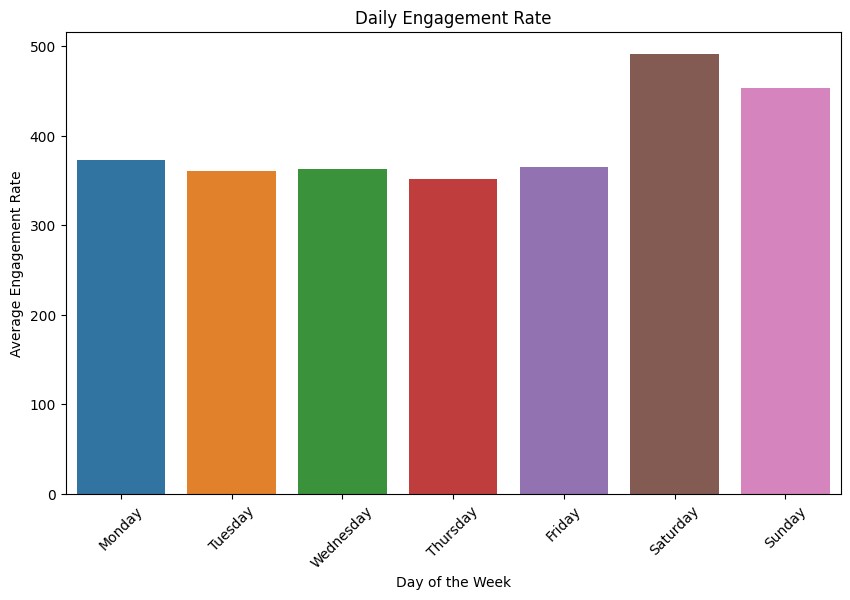

In [ ]:
# Visualize daily engagement patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_engagement.index, y=daily_engagement.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Engagement Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Suggest optimal content types based on highest engagement
top_content_types = data.groupby('content')['engagement_rate'].mean().nlargest(5).index.tolist()

# Print results
print(f"Optimal Tweeting Time: {optimal_tweeting_time} o'clock")

Optimal Tweeting Time: 3 o'clock


In [ ]:
print(f"Top Content Types:\n {',   '.join(top_content_types)}")

Top Content Types:
 Watch what happens when two monkeys are offered unequal pay for the same task: https://t.co/vjmcfdxt9Z https://t.co/Lew6E1nykY,   “If girls grow up in a world where words like 'crazy' and 'psycho' and 'hysterical' are casually used to describe female enthusiasm, how does that shape the way those girls see themselves?”

Watch @YveBlake's full TED Talk here: https://t.co/y0qGmG8buQ https://t.co/uw4w02WTlm,   "My question to you is, is this what you want? Is this how you want history to remember you? As the handmaidens to authoritarianism?"

Watch as @carolecadwalla calls out the "gods of Silicon Valley" for being on the wrong side of history: https://t.co/SrTKzCbPSV #TED2019 https://t.co/ETaXSdgWUq,   @netflix Thank you for coming to my TED Talk,   "Everyone keeps saying climate change is an existential threat, and yet they just carry on like before. I don't understand that, because if the emissions have to stop, then we must stop the emissions. To me that is black or

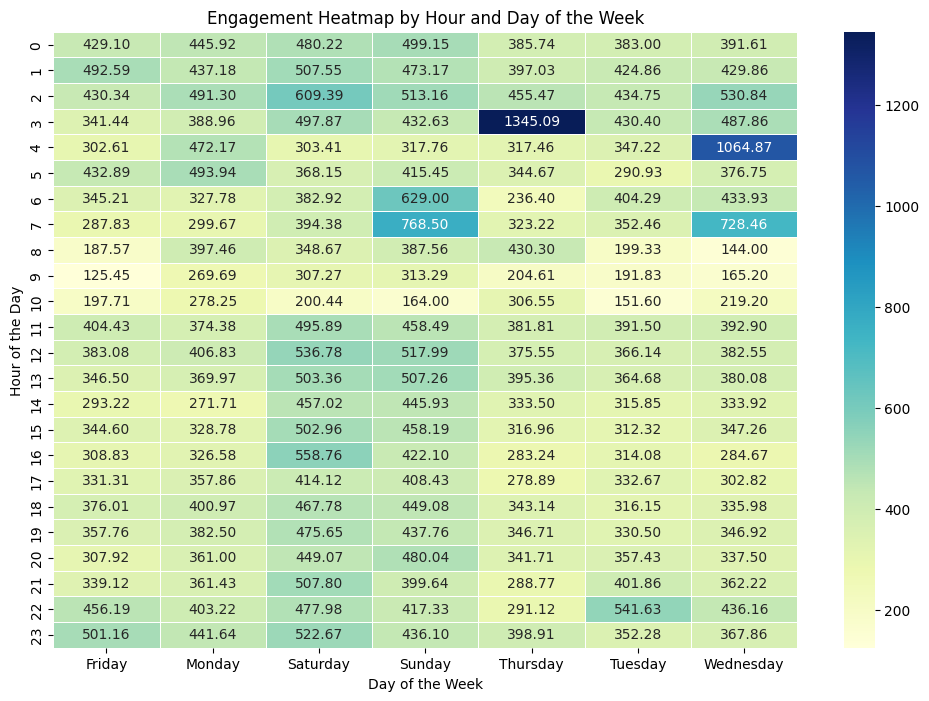

In [ ]:
heatmap_data = data.groupby(['hour', 'day_of_week'])['engagement_rate'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Engagement Heatmap by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


In [ ]:
# Find the best day and hour based on the highest average engagement rate
best_day = daily_engagement.idxmax()
best_hour = hourly_engagement.idxmax()


print(f"Best Day for Tweeting: {best_day}")
print(f"Best Hour for Tweeting: {best_hour}")

Best Day for Tweeting: Saturday
Best Hour for Tweeting: 3


In [ ]:
# data.drop(['timestampy'],inplace=True,axis=1)
data.head()

,content,likeCount,outlinks,quoteCount,replyCount,retweetCount,url,id,conversationId,timestampy,hour,day_of_week,engagement_rate
timestamp,,,,,,,,,,,,,
2022-12-20 00:08:40,"""Next time you see an insect, consider that th...",36,['http://t.ted.com/pBAKgRg'],1,1,16,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712,2022-12-20 00:08:40,0,Tuesday,53
2022-12-18 17:03:55,These inspiring and energizing albums and book...,56,['http://t.ted.com/1d4w6jb'],0,2,10,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323,2022-12-18 17:03:55,17,Sunday,66
2022-12-17 17:03:26,From the intoxicating and euphoric feelings of...,94,['http://t.ted.com/BtYQhJF'],2,3,27,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256,2022-12-17 17:03:26,17,Saturday,123
2022-12-17 03:55:26,How will Millennials and Gen Z spend the world...,71,['http://t.ted.com/nlk6grM'],1,12,14,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136,2022-12-17 03:55:26,3,Saturday,86
2022-12-16 03:38:59,Forget buying your kids the “best-rated” toys ...,141,['http://t.ted.com/cJKZDq3'],4,2,35,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256,2022-12-16 03:38:59,3,Friday,180


# Interactive Engagement

In [ ]:
import os
import tweepy
# Set environment variables
os.environ['TWITTER_API_KEY'] = ''
os.environ['TWITTER_API_KEY_SECRET'] = ''
os.environ['TWITTER_CONSUMER_ID'] = ''
os.environ['TWITTER_CLIENT_SECRET'] = ''
os.environ['TWITTER_BEAR_TOKEN'] = ''
os.environ['TWITTER_ACCESS_TOKEN'] = ''
os.environ['TWITTER_ACCESS_TOKEN_SECRET'] = ''
os.environ['OPENAI_API_KEY'] = ''
os.environ['PERSONA_TOKEN_AIRTABLE'] = ''
os.environ['TOKEN2'] = '.'
os.environ['TABLE'] = 'twisty'

twitter_api_key = os.environ.get('TWITTER_API_KEY')
twitter_api_key_secret = os.environ.get('TWITTER_API_KEY_SECRET')
twitter_consumer_id = os.environ.get('TWITTER_CONSUMER_ID')
twitter_client_secret = os.environ.get('TWITTER_CLIENT_SECRET')
twitter_bear_token = os.environ.get('TWITTER_BEAR_TOKEN')
twitter_access_token = os.environ.get('TWITTER_ACCESS_TOKEN')
twitter_access_token_secret = os.environ.get('TWITTER_ACCESS_TOKEN_SECRET')
openai_api_key = os.environ.get('OPENAI_API_KEY')
persona_token_airtable = os.environ.get('PERSONA_TOKEN_AIRTABLE')
token2 = os.environ.get('TOKEN2')
table = os.environ.get('TABLE')
table = os.environ.get('TABLE')

# Use the retrieved API keys and tokens in your script
print(f"Twitter API Key: {twitter_api_key}")
print(f"OpenAI API Key: {openai_api_key}")


In [ ]:
client = tweepy.Client(twitter_bear_token , twitter_api_key ,twitter_api_key_secret,twitter_access_token,twitter_access_token_secret)

auth = tweepy.OAuth1UserHandler(twitter_api_key ,twitter_api_key_secret,twitter_access_token,twitter_access_token_secret)

api = tweepy.API(auth)

In [ ]:
ChatOpenAI?

In [ ]:
import tweepy
import openai
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
class TwitterBot:
    def __init__(self, twitter_credentials, openai_api_key):
        self.llm = ChatOpenAI(temperature=.5,max_tokens=45, openai_api_key=OPENAI_API_KEY, model_name='gpt-3.5-turbo')
        self.twitter_credentials = twitter_credentials
        self.openai_api_key = openai_api_key
        self.auth_twitter()
        self.configure_openai_api()

    def auth_twitter(self):
        auth = tweepy.OAuthHandler(self.twitter_credentials['consumer_key'], self.twitter_credentials['consumer_secret'])
        auth.set_access_token(self.twitter_credentials['access_token'], self.twitter_credentials['access_token_secret'])
        self.twitter_api = tweepy.API(auth)

    def configure_openai_api(self):
        openai.api_key = self.openai_api_key

    def reply_to_mentions(self):
        mentions = self.twitter_api.mentions_timeline()

        for mention in mentions:
            user_text = mention.text
            reply_text = self.generate_reply(user_text)
            reply_to_tweet_id = mention.id

            try:
                self.twitter_api.update_status(f"@{mention.user.screen_name} {reply_text}", in_reply_to_status_id=reply_to_tweet_id)
                print(f'Replied to tweet by @{mention.user.screen_name}: {mention.text}')
            except tweepy.TweepError as e:
                print(f"Error replying to tweet: {str(e)}")

    def generate_reply(self, mentioned_conversation_tweet_text):
        system_template = """
            You are a creative genius with a knack for innovative ideas.
            Your goal is to inspire and guide users with their creative projects.

            % RESPONSE TONE:

            - Your responses should be enthusiastic, encouraging, and imaginative
            - Inject a sense of curiosity and wonder into your tone

            % RESPONSE FORMAT:

            - Share inspiring ideas concisely
            - Keep responses engaging, but not too lengthy
            - Avoid the use of emojis

            % RESPONSE CONTENT:

            - Offer unique and imaginative suggestions
            - If you need more information, kindly ask the user for details
            - If an idea isn't coming to mind, express curiosity and encourage exploration
        """
        system_message_prompt = SystemMessagePromptTemplate.from_template(system_template)

        human_template="{text}"
        human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

        chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

        # get a chat completion from the formatted messages
        final_prompt = chat_prompt.format_prompt(text=mentioned_conversation_tweet_text).to_messages()
        response = self.llm(final_prompt).content

        return response

    def reply_to_mention_by_conversation_id(self,conversation_id, mentioned_conversation_tweet_text):
        try:
            respone = self.generate_reply(mentioned_conversation_tweet_text)

            respone = respone.replace('\n', ' ')  # Replace newline with space

            print(respone)
            client.create_tweet(in_reply_to_tweet_id=conversation_id, text=respone)
            print("Reply sent successfully.")
        except tweepy.errors.TweepyException as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    # Replace with your actual Twitter and OpenAI API credentials
    twitter_credentials = {
        'consumer_key': '',
        'consumer_secret': '',
        'access_token': '',
        'access_token_secret': ''
    }

    openai_api_key = ''

    bot = TwitterBot(twitter_credentials, openai_api_key)
    conv_id = 1704286438253007151
    conv_text = "Xbox boss Phil Spencer says buying Nintendo would be a 'good move for both companies[That] would be a career momentIt's just taking a long time for Nintendo to see that their future exists off of their own hardware"
    bot.reply_to_mention_by_conversation_id(conv_id,conv_text)

Wow, the idea of Xbox and Nintendo joining forces is truly exciting! Imagine the endless possibilities that could arise from such a collaboration. While it's true that Nintendo has always been known for their incredible hardware, branching out into new
Reply sent successfully.


In [ ]:
# # Function to reply to a mention by conversation ID
# def reply_to_mention_by_conversation_id(conversation_id, reply_text):
#     try:
#         client.create_tweet(in_reply_to_tweet_id=conversation_id, text=reply_text)
#         print("Reply sent successfully.")
#     except tweepy.errors.TweepyException as e:
#         print(f"Error: {e}")

# # Example usage
# if __name__ == "__main__":
#     conversation_id = '1704276633492894056'
#     reply_text = 'Thanks for the mention!'

#     reply_to_mention_by_conversation_id(conversation_id, reply_text)

# Followers' Interest Mapping

In [ ]:
df.columns

Index(['content', 'likeCount', 'outlinks', 'quoteCount', 'replyCount',
       'retweetCount', 'url', 'id', 'conversationId'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import re

# Step 3: Identify High-Performing Content
# Calculate engagement score as a combination of 'likeCount,' 'retweetCount,' 'replyCount,' and 'quoteCount'
df['EngagementScore'] = df['likeCount'] + df['retweetCount'] + df['replyCount'] + df['quoteCount']

# Identify top-performing tweets based on engagement score
top_tweets = df.nlargest(2, 'EngagementScore')


url_pattern = r'https?://\S+|www\.\S+'

def remove_urls(text):
    return re.sub(url_pattern, '', text)

df['content'] = df['content'].apply(remove_urls)

# Create a Count Vectorizer for text analysis
vectorizer = CountVectorizer(max_features=10, stop_words='english')
tf_matrix = vectorizer.fit_transform(df['content'])

num_topics = 3  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tf_matrix)
topic_words = []

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-5:][::-1]  # Adjust the number of top words
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    topic_words.append(top_words)


for topic_idx, words in enumerate(topic_words):
    print(f"Topic {topic_idx + 1}: {', '.join(words)}")

i = 0
for idx, row in top_tweets.iterrows():
    print(idx)
    print(f"Content Strategy for Top Tweet {str(idx)}:")
    print(f"Topic: {', '.join(topic_words[i])}")
    i+=1
    print(f"Engagement Score: {row['EngagementScore']}")
    print(f"Tweet Text: {row['content']}")
    print("\n")




Topic 1: ted, talk, people, watch, talks
Topic 2: life, make, people, ted, watch
Topic 3: world, help, new, talks, ted
2017-11-30 03:14:38
Content Strategy for Top Tweet 2017-11-30 03:14:38:
Topic: ted, talk, people, watch, talks
Engagement Score: 72237
Tweet Text: Watch what happens when two monkeys are offered unequal pay for the same task: https://t.co/vjmcfdxt9Z https://t.co/Lew6E1nykY


2020-02-29 16:00:00
Content Strategy for Top Tweet 2020-02-29 16:00:00:
Topic: life, make, people, ted, watch
Engagement Score: 70063
Tweet Text: “If girls grow up in a world where words like 'crazy' and 'psycho' and 'hysterical' are casually used to describe female enthusiasm, how does that shape the way those girls see themselves?”

Watch @YveBlake's full TED Talk here: https://t.co/y0qGmG8buQ https://t.co/uw4w02WTlm




In [ ]:
df['content'].iat[560]

'This is why your cat is such a weirdo: '

In [ ]:
output_file = "new_content.txt"

with open(output_file, 'w', encoding='utf-8') as file:
    for content in df['content']:
        file.write(content + '\n')

print(f"Contents from df['content'] have been written to {output_file}")


Contents from df['content'] have been written to new_content.txt


In [ ]:


content_strategies = {}

for topic_idx, words in enumerate(topic_words):
    print(words)
    # Generate content ideas based on the keywords using GPT-3
    system_prompt = f"You are a social media strategist, and your goal is to suggest content strategies that cater to the interests of your audience while expanding your reach for the topic of \"{topic}\". Your current data indicates that user engagement is influenced by factors such as likes, retweets, replies, and quotes. Please provide a detailed plan with actionable steps and content ideas to achieve this objective."

    prompt = f"Suggest content strategies to cater to those interests while expanding reach for {words}."
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=50,
        n=1
    )

    # Extract and store the generated content idea
    content_strategies[topic_idx] = response.choices[0].text.strip()

# Print the content strategies generated by GPT-3
for topic, strategy in content_strategies.items():
    print(f"Content Strategy for {topic}:")
    print(strategy)
    print("\n")

['ted', 'talk', 'people', 'watch', 'talks']
['life', 'make', 'people', 'ted', 'watch']
['world', 'help', 'new', 'talks', 'ted']
Content Strategy for 0:
1. Create content around popular TED talks, including interviews with the speakers and thought leaders who presented at the event.
2. Feature TED Talk viewers discussing why they enjoy watching the talks and what topics they'd like to see covered.


Content Strategy for 1:
1.Create content around life hacks, tips, and advice that people can use to make their lives easier. 
2.Share inspiring stories of people from around the world who have achieved great success with the help of TED talks.


Content Strategy for 2:
1. Create an online platform dedicated to world-changing talks. This platform could host a range of TED-sponsored talks and feature discussions and stories from people around the world who are making an impact. 

2. Highlight and




# Followers' Interest Mapping

In [ ]:
import pandas as pd

df_gender = pd.read_csv('/Users/pepo_abdo/Downloads/gender-classifier-DFE-791531.csv',encoding='iso-8859-1')

In [ ]:
df_gender.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
df_gender.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df_gender_filtered = df_gender[['name','text','description']]

In [ ]:
df_gender_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         20050 non-null  object
 1   text         20050 non-null  object
 2   description  16306 non-null  object
dtypes: object(3)
memory usage: 470.0+ KB


In [ ]:
duplicate_count_txt = df_gender_filtered['text'].duplicated().sum()
duplicate_count_dis = df_gender_filtered['description'].duplicated().sum()

In [ ]:
duplicate_count_txt , duplicate_count_dis

(1638, 4909)

In [ ]:
# Assuming df_gender_filtered is your DataFrame and you want to drop duplicates in the 'description' column
df_gender_filtered.drop_duplicates(subset='description', inplace=True)
df_gender_filtered.drop_duplicates(subset='text', inplace=True)

/var/folders/g6/h0vz4vbn1xq0r9cm1px3d16m0000gn/T/ipykernel_2290/798985310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_filtered.drop_duplicates(subset='description', inplace=True)
/var/folders/g6/h0vz4vbn1xq0r9cm1px3d16m0000gn/T/ipykernel_2290/798985310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_filtered.drop_duplicates(subset='text', inplace=True)


In [ ]:
df_gender_filtered.shape

(14942, 3)

In [ ]:
df_gender_filtered = df_gender_filtered.dropna().reset_index(drop=True)

In [ ]:
df_gender_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         14941 non-null  object
 1   text         14941 non-null  object
 2   description  14941 non-null  object
dtypes: object(3)
memory usage: 350.3+ KB


In [ ]:
df_gender_filtered.head()

,name,text,description
0,sheezy0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,DavdBurnett,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,douggarland,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [ ]:
import re
# Regular expression to match URLs (HTTP and HTTPS)
url_pattern = r'https?://\S+|www\.\S+'

# Function to remove URLs from text
def remove_urls(text):
    cleaned_text = re.sub(r'http[s]?\S+', '', text)
    return re.sub(url_pattern, '', cleaned_text)

def clean_text(text):
    # Define the regular expression pattern to remove non-alphanumeric characters and whitespace
    pattern = r'[^\w\s]'
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [ ]:
df_gender_filtered['description'] = df_gender_filtered['description'].apply(clean_text)
df_gender_filtered['description'] = df_gender_filtered['description'].apply(remove_urls)

Cluster Sizes:
cluster_label
0    12446
1     1577
2      918
Name: count, dtype: int64

Examples from Each Cluster:
Cluster 0:
                                                text  \
0  Robbie E Responds To Critics After Win Against...   
2  i absolutely adore when louis starts the songs...   
3  Hi @JordanSpieth - Looking at the url - do you...   
4  Watching Neighbours on Sky+ catching up with t...   
6  @BpackEngineer Thank you for your patience whi...   

                                         description  
0                               i sing my own rhythm  
2                louis whining and squealing and all  
3  Mobile guy  49ers Shazam Google Kleiner Perkin...  
4  Ricky Wilson The Best FRONTMANKaiser Chiefs Th...  
6  A global marketplace for images videos and mus...  


Cluster 1:
                                                 text  \
1   ÛÏIt felt like they were my friends and I was...   
14  will i even need sound effects for the diviner...   
15  @giannaaa28 lmao 

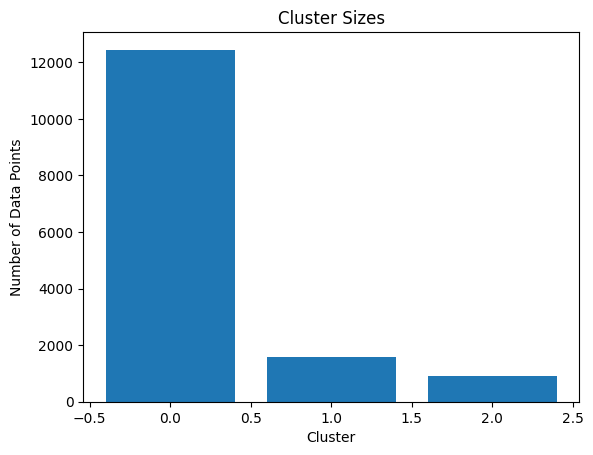

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select the columns for clustering
selected_columns = [ 'text', 'description']

# Combine selected text columns into a single text column
df_gender_filtered['combined_text'] = df_gender_filtered[selected_columns].apply(lambda row: ' '.join(row), axis=1)

df_gender_filtered['combined_text'] = df_gender_filtered['combined_text'].apply(clean_text)

df_gender_filtered['combined_text'] = df_gender_filtered['combined_text'].apply(remove_urls)
df_gender_filtered['text'] = df_gender_filtered['text'].apply(clean_text)

df_gender_filtered['text'] = df_gender_filtered['text'].apply(remove_urls)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_gender_filtered['combined_text'])

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

df_gender_filtered['cluster_label'] = kmeans.labels_

cluster_sizes = df_gender_filtered['cluster_label'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

print("\nExamples from Each Cluster:")
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    cluster_examples = df_gender_filtered[df_gender_filtered['cluster_label'] == cluster].head(5)
    print(cluster_examples[selected_columns])
    print("\n")


df_gender_filtered.to_csv('clustered_data.csv')

plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.show()


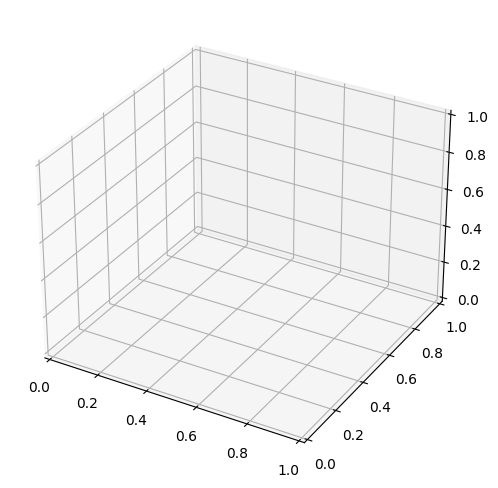

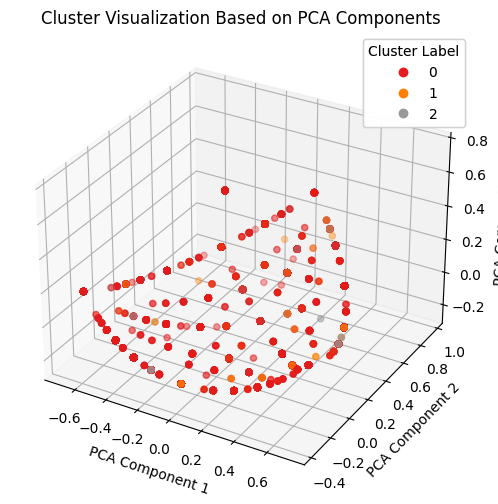

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

tfidf_vectorizer = TfidfVectorizer(max_features=3)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df_gender_filtered['combined_text'])

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray())


# Create a 3D scatterplot with PCA components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot with hue based on cluster_label
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df_gender_filtered['cluster_label'], cmap='Set1')

# Add labels and legend
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('Cluster Visualization Based on PCA Components')
legend1 = ax.legend(*scatter.legend_elements(), title='Cluster Label')
ax.add_artist(legend1)

# Show the plot
plt.show()

In [ ]:
df_gender_filtered.head()

,name,text,description,combined_text,cluster_label
0,sheezy0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm,Robbie E Responds To Critics After Win Against...,0
1,DavdBurnett,ÛÏIt felt like they were my friends and I was...,Im the author of novels filled with family dra...,It felt like they were my friends and I was li...,1
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,louis whining and squealing and all,i absolutely adore when louis starts the songs...,0
3,douggarland,Hi @JordanSpieth - Looking at the url - do you...,Mobile guy 49ers Shazam Google Kleiner Perkin...,Hi JordanSpieth Looking at the url do you us...,0
4,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMANKaiser Chiefs Th...,Watching Neighbours on Sky catching up with th...,0


In [ ]:
df_gender_filtered['combined_text'].iat[1]

'It felt like they were my friends and I was living the story with them  retired IAN1  Im the author of novels filled with family drama and romance'

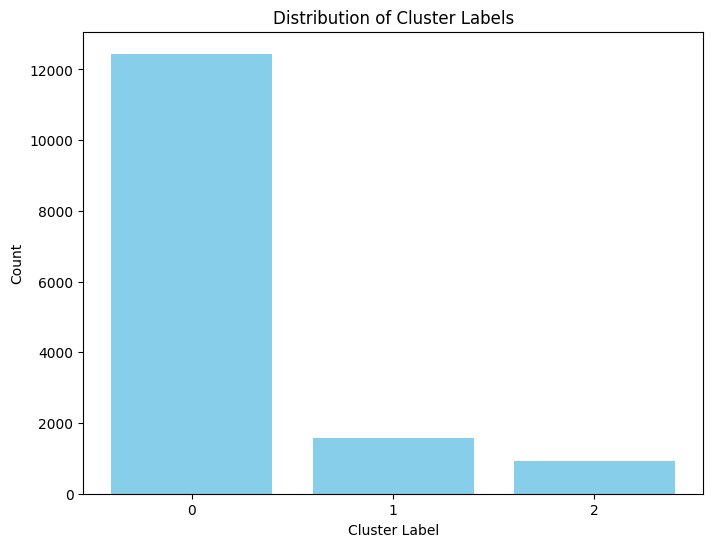

In [ ]:
cluster_counts = df_gender_filtered['cluster_label'].value_counts()

# Create a bar plot to show the distribution
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Cluster Labels')
plt.xticks(cluster_counts.index)
plt.show()

In [ ]:
df_gender_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           14941 non-null  object
 1   text           14941 non-null  object
 2   description    14941 non-null  object
 3   combined_text  14941 non-null  object
 4   cluster_label  14941 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 525.4+ KB


In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing
import nltk


In [ ]:
nltk.download('stopwords')

# Create an instance of WhiteSpacePreprocessing
sp = WhiteSpacePreprocessing(df_gender_filtered['combined_text'], stopwords_language='english')

# Preprocess the text
res = sp.preprocess()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pepo_abdo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/contextualized_topic_models/utils/preprocessing.py:24: UserWarning: WhiteSpacePreprocessing is deprecated and will be removed in future versions.Use WhiteSpacePreprocessingStopwords.
  warnings.warn("WhiteSpacePreprocessing is deprecated and will be removed in future versions."


In [ ]:
preprocessed_documents, unpreprocessed_corpus, vocab = res[0] , res[1] , res[2]

In [ ]:
len(preprocessed_documents) , len(unpreprocessed_corpus)

(11849, 11849)

In [ ]:
unpreprocessed_corpus[:2]

['Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries  i sing my own rhythm.',
 'i absolutely adore when louis starts the songs it hits me hard but it feels good louis whining and squealing and all']

In [ ]:
preprocessed_documents[:2]


['win sing', 'absolutely louis starts songs hard feels good louis']

- Documents that have not been preprocessed should not be removed because they will be used as input to obtain -document embeddings for SBERT that reflect the context. The document before and after preprocessing is passed to the TopicModelDataPreparation object. This object obtains the BERT embedding of the document, reflecting the bag of words and context. The pretrained BERT we will use here is paraphrase-distilroberta-base-v1.

In [ ]:
tp = TopicModelDataPreparation("paraphrase-distilroberta-base-v1")
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)


In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
#Now we train the topic model. Here, 50 topics (n_components) corresponding to hyperparameters are selected.
# Define the parameters for the CTM
bow_size = len(tp.vocab)  # Replace with the actual size of your BoW vocabulary
contextual_size = 768  # The size of contextual information (e.g., word embeddings)
n_components = 50  # Number of topics
num_epochs = 20  # Number of training epochs

ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=50, num_epochs=20)
ctm.fit(training_dataset)

Epoch: [20/20]	 Seen Samples: [236800/237120]	Train Loss: 103.64137173214475	Time: 0:00:47.744975: : 20it [16:08, 48.44s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 186/186 [00:45<00:00,  4.08it/s]


In [ ]:
ctm.get_topic_lists()[0]

['fan',
 'also',
 'lover',
 'sports',
 'things',
 'proud',
 'life',
 'writer',
 'enthusiast',
 'god']

- ctm.get_ldavis_data_format: This method is used to prepare data in a format that is compatible with LDAVis for visualization.
- tp.vocab: It appears that you are using a vocab object from the tp (TopicModelDataPreparation) instance. This likely contains the vocabulary information for your topic model.
- training_dataset: This is the dataset used for training your topic model. LDAVis uses this data to calculate various statistics for topic visualization.

In [ ]:
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 186/186 [00:46<00:00,  4.03it/s]


In [ ]:
import pyLDAvis as vis

lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 186/186 [00:49<00:00,  3.72it/s]


# Technique 2
# Topic Modeling with GPT-3

# 1-Text Embedding

In [ ]:
df_gender_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           14941 non-null  object
 1   text           14941 non-null  object
 2   description    14941 non-null  object
 3   combined_text  14941 non-null  object
 4   cluster_label  14941 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 525.4+ KB


In [ ]:
pd.read_csv('/Users/pepo_abdo/Desktop/ml/TWITTER/twitty/pipelines/cleaned_data.csv').isnull().sum()

name              0
text              0
description      85
combined_text     0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP
from hdbscan import HDBSCAN
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
import openai
import os
openai.api_key = 'sk-'

/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/numba/cpython/hashing.py:482: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


#### This combination of small-scale efficiency and competitive performance makes it a popular choice for those seeking an optimal balance between speed and effectiveness in text embedding.
- transform all the text data within the DataFrame into vectorized representations.

In [ ]:
embed_model = SentenceTransformer("BAAI/bge-small-en")
text_embeddings = embed_model.encode(df_gender_filtered['description'].tolist(), show_progress_bar=True)

/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/transformers/modeling_utils.py:402: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:


Batches:   0%|          | 0/467 [00:00<?, ?it/s]

In [ ]:
df_gender_filtered['embeddings_dis'] = list(text_embeddings)

## Dimension Reduction — UMAP
- Reducing dimensionality is crucial to improve the efficiency and effectiveness of the clustering process. High-dimensional data often suffer from the “curse of dimensionality” where distances between data points become less meaningful and clusters may become sparse or less apparent

1. n_neighbors controls how UMAP balances local versus global structure in the data. Low values of n_neighbors will force UMAP to concentrate on very local structure, while large values will push UMAP to look at larger neighborhoods of each point, losing fine detail structure for the sake of getting the broader of the data.
2. n_components sets the desired dimensionality after reduction
3. min_dist defines the minimum distance between points in the low-dimensional space. Low values of min_dist will result in clumpier embeddings while larger values of min_dist will prevent UMAP from packing points together and will focus on the preservation of the broad topological structure instead.

In [ ]:
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine')
reduced_text_embeddings = umap_model.fit_transform(text_embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
hdbscan_model = HDBSCAN(
    min_cluster_size=40,
    metric='euclidean',
    min_samples=5,
    prediction_data=False)

text_cluster = hdbscan_model.fit(reduced_text_embeddings)
df_gender_filtered['cluster'] = text_cluster.labels_

## Extracting Diverse and Representative Documents
- In this segment, we employ a sophisticated approach to extract the most representative documents from each cluster while ensuring diversity in the selections. The primary objective is to identify a set of documents that effectively encapsulate the essence of a given topic cluster without redundancy.




- Maximal Marginal Relevance (MMR) is a mathematical concept frequently employed in information retrieval. It plays a pivotal role in optimizing search results by considering both the similarity between the query and each list item (Sim(query, item)) and the diversity among items (Sim(item1, item2)). MMR achieves this balance through the use of a parameter, often referred to as lambda, which influences the trade-off between diversity and accuracy in the final selection of items. By adjusting this lambda value, one can fine-tune the algorithm’s behavior, emphasizing either greater relevance (with a lower lambda) or more diversity (with a higher lambda) in the selected set of items.
![image.png](attachment:image.png)

In [ ]:
top_n = 10
diversity = 0.5
cluster_dict = {}

for cluster, df in df_gender_filtered.groupby('cluster'):
    if cluster == -1:
        continue

    # find the most representative documents
    candidate_d = cosine_similarity(df_gender_filtered['embeddings_dis'].tolist(), df_gender_filtered['embeddings_dis'].tolist())
    candidate_d_sum = candidate_d.sum(axis=1)
    doc_list = [np.argmax(candidate_d.sum(axis=1))]
    candidates_idx = [i for i in range(len(df_gender_filtered)) if i != doc_list[0]]

    # filter based on maximal marginal relevance
    for _ in range(top_n - 1):
        candidate_similarities = candidate_d.sum(axis=1)[candidates_idx]
        target_similarities = np.max(candidate_d[candidates_idx][:, doc_list], axis=1)

        # Calculate MMR
        mmr = (1 - diversity) * candidate_similarities - diversity * target_similarities
        # Update keywords & candidates
        mmr_idx = candidates_idx[np.argmax(mmr)]
        doc_list.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    cluster_dict[cluster] = {'doc': [df_gender_filtered['description'].tolist()[idx] for idx in doc_list]}

In [ ]:
def get_reponse(prompt, temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0,
        max_tokens=100)
    return response.choices[0].message["content"]

for i in cluster_dict.keys():

    # prompt
    documents = "\n".join([f"{c + 1}.{text}" for c, text in enumerate(cluster_dict[i]['doc'])])
    prompt = f"Generate a concise and informative topic title that captures the essence of the following collection of user BIO descriptions from the same Twitter cluster:\n{documents}"
    # response from openai
    llm_output = get_reponse(prompt)
    cluster_dict[i]['topic'] = llm_output
    break

In [ ]:
llm_output

'"Twitter Cluster: User BIO Descriptions Reflecting Diverse Interests and Personalities"'

In [ ]:
idx = 0
cluster_dict[idx]['doc']

['I love Jesus IG andrenaee  snapchat andrenae',
 'twitter accout for everythingjays be sure to follow us on instagram everythingbluejays',
 ' mutuals pls warn me when u tweet pics of bigup close eyes thank u',
 'ex solider 1RRW I tweet for fun if you belong on twatter please feel free to jog on all the voices in my head belong to everyone of me',
 'Retweet  follow me if you like my tweets about love lifeand happiness',
 'REVIVALFollow me on instagram guys selenatorswagforever my private alessiagotti',
 'visionary afrolatina wit an attitude thx to yall',
 'peace motherfuckers  IG PugnificentDesigns ',
 'Fuxk a bio yall follow my new twitter Free EazyRest myLoves EmilyChrisLamikand Doo',
 'I never thought Id end up where I am today Wife mother and oh yeah Queen of Hell TrueKingOfHell and RedEyedCharmer own my heart RP OC Demon 21']

In [ ]:
cluster_dict

{0: {'doc': ['I love Jesus IG andrenaee  snapchat andrenae',
   'twitter accout for everythingjays be sure to follow us on instagram everythingbluejays',
   ' mutuals pls warn me when u tweet pics of bigup close eyes thank u',
   'ex solider 1RRW I tweet for fun if you belong on twatter please feel free to jog on all the voices in my head belong to everyone of me',
   'Retweet  follow me if you like my tweets about love lifeand happiness',
   'REVIVALFollow me on instagram guys selenatorswagforever my private alessiagotti',
   'visionary afrolatina wit an attitude thx to yall',
   'peace motherfuckers  IG PugnificentDesigns ',
   'Fuxk a bio yall follow my new twitter Free EazyRest myLoves EmilyChrisLamikand Doo',
   'I never thought Id end up where I am today Wife mother and oh yeah Queen of Hell TrueKingOfHell and RedEyedCharmer own my heart RP OC Demon 21'],
  'topic': '"Twitter Cluster: User BIO Descriptions Reflecting Diverse Interests and Personalities"'},
 1: {'doc': ['I love Je

In [ ]:
idx = 0
print(cluster_dict[idx]['topic'])
print("\n")
for i, d in enumerate(cluster_dict[idx]['doc']):
    print(f'{i}. {d} \n')

"Twitter Cluster: User BIO Descriptions Reflecting Diverse Interests and Personalities"


0. I love Jesus IG andrenaee  snapchat andrenae 

1. twitter accout for everythingjays be sure to follow us on instagram everythingbluejays 

2.  mutuals pls warn me when u tweet pics of bigup close eyes thank u 

3. ex solider 1RRW I tweet for fun if you belong on twatter please feel free to jog on all the voices in my head belong to everyone of me 

4. Retweet  follow me if you like my tweets about love lifeand happiness 

5. REVIVALFollow me on instagram guys selenatorswagforever my private alessiagotti 

6. visionary afrolatina wit an attitude thx to yall 

7. peace motherfuckers  IG PugnificentDesigns  

8. Fuxk a bio yall follow my new twitter Free EazyRest myLoves EmilyChrisLamikand Doo 

9. I never thought Id end up where I am today Wife mother and oh yeah Queen of Hell TrueKingOfHell and RedEyedCharmer own my heart RP OC Demon 21 



In [ ]:
# Combined_Text
# idx = 0
# print(cluster_dict[idx]['topic'])
# print("\n")
# for i, d in enumerate(cluster_dict[idx]['doc']):
#     print(f'{i}. {d} \n')

In [ ]:
df_gender_filtered.head()

,name,text,description,combined_text,cluster_label,embeddings_dis,cluster
0,sheezy0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm,Robbie E Responds To Critics After Win Against...,0,"[-0.3209917, -0.59091926, 0.35025752, -0.36828...",1
1,DavdBurnett,ÛÏIt felt like they were my friends and I was...,Im the author of novels filled with family dra...,It felt like they were my friends and I was li...,1,"[-0.16471611, -0.041048404, 0.33179337, -0.463...",1
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,louis whining and squealing and all,i absolutely adore when louis starts the songs...,0,"[-0.23694627, 0.069333695, 0.32851437, -0.0207...",1
3,douggarland,Hi @JordanSpieth - Looking at the url - do you...,Mobile guy 49ers Shazam Google Kleiner Perkin...,Hi JordanSpieth Looking at the url do you us...,0,"[-0.41538012, 0.07215085, 0.17357549, -0.62332...",1
4,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMANKaiser Chiefs Th...,Watching Neighbours on Sky catching up with th...,0,"[-0.24476662, -0.10989636, 0.54055595, -0.3062...",1


In [ ]:
# df_gender_filtered.to_csv('Cluster_Embedding.csv')

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Cluster_Embedding.csv')

# Drop the 'Unnamed: 0' column in-place
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Display the first few rows of the DataFrame
df.head()


,name,text,description,combined_text,cluster_label,embeddings_dis,cluster
0,sheezy0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm,Robbie E Responds To Critics After Win Against...,0,[-3.20991695e-01 -5.90919256e-01 3.50257516e-...,1
1,DavdBurnett,ÛÏIt felt like they were my friends and I was...,Im the author of novels filled with family dra...,It felt like they were my friends and I was li...,1,[-1.64716110e-01 -4.10484038e-02 3.31793368e-...,1
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,louis whining and squealing and all,i absolutely adore when louis starts the songs...,0,[-2.36946270e-01 6.93336949e-02 3.28514367e-...,1
3,douggarland,Hi @JordanSpieth - Looking at the url - do you...,Mobile guy 49ers Shazam Google Kleiner Perkin...,Hi JordanSpieth Looking at the url do you us...,0,[-4.15380120e-01 7.21508488e-02 1.73575491e-...,1
4,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMANKaiser Chiefs Th...,Watching Neighbours on Sky catching up with th...,0,[-2.44766623e-01 -1.09896362e-01 5.40555954e-...,1


In [ ]:
df.head(200).to_csv('Cluster_Embedding2.csv')

In [ ]:
def get_reponse(prompt, temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0,
        max_tokens=100)
    return response.choices[0].message["content"]

# Trending Topic Insights

In [ ]:
import time
results_df = pd.DataFrame(columns=['name','combined_text', 'interests'])
 i =0
# Loop through each row in the original DataFrame
for index, row in df_gender_filtered.iterrows():
    combined_text = df_gender_filtered.loc[index,'combined_text']
    name = df_gender_filtered.loc[index,'name']
    print(combined_text)

    # Create a prompt using the extracted text
    prompt = f"return only one word by Generate a concise and informative topic title that captures the essence of the following collection of user BIO descriptions from :\n{combined_text} "

    respone = get_reponse(prompt, temperature=3)
    # Find the index of ":"
    colon_index = respone.find(":")
    # Extract the text after the colon
    user_interest = respone[colon_index + 1:].strip()

    res = {'name' : str(name),'combined_text': str(combined_text), 'interests': str(user_interest)}
    results_df = pd.concat([results_df, pd.DataFrame([res])], ignore_index=True)
    i = i+1
    if i > 10:
        break
    time.sleep(15)

# Display or save the results DataFrame as needed
results_df

Robbie E Responds To Critics After Win Against Eddie Edwards In The WorldTitleSeries  i sing my own rhythm
It felt like they were my friends and I was living the story with them  retired IAN1  Im the author of novels filled with family drama and romance
i absolutely adore when louis starts the songs it hits me hard but it feels good louis whining and squealing and all
Hi JordanSpieth  Looking at the url  do you use IFTTT  Dont typically see an advanced user on the PGATOUR  Mobile guy  49ers Shazam Google Kleiner Perkins Yahoo Sprint PCS AirTouch Air Force  Stanford GSB UVa  Dad Husband Brother  Golfer
Watching Neighbours on Sky catching up with the Neighbs Xxx  Xxx Ricky Wilson The Best FRONTMANKaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always  Xxxxxxx
Ive seen people on the train with lamps chairs tvs etc   you dont know me
BpackEngineer Thank you for your patience while we take care of the issue A global marketplace

Gala Bingo clubs bought for 241m The UKs largest High Street bingo operator Gala is being taken over by  Discover how to heal your illness and pains
Do you know who are awesome My 4 new followers in the last week Growing with  Team di reporter e giornalisti lavoriamo con video e web La nostra giornata tra cronaca attualit politica e sport 
infosmliveit
camerons side of the bed smells SO bad I like to sleep
wishbonecon are u going to the 130 one  ask no questions and youll get no lies spoopytaylor
HakeemNLT Boii make the wafflw link to the reference then the word count should clear up lol For any photography bookings or enquiries DM call me on 07508547008 or email me at abphotography1989gmailcom Instaabphotography25  TeamChrist

Am I the only one who loves the part with Merlin and Reginas face D OUAT Born in Czech Republic live in Ireland wanna be in Germany
OUAT  OITNB


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:21                                                                                   │
│                                                                                                  │
│   18 │                                                                                           │
│   19 │   res = {'name' : str(name),'combined_text': str(combined_text), 'interests': str(user    │
│   20 │   results_df = pd.concat([results_df, pd.DataFrame([res])], ignore_index=True)            │
│ ❱ 21 │   time.sleep(20)                                                                          │
│   22                                                                                             │
│   23 # Display or save the results DataFrame as needed                                           │
│   24 results_df                                                                                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [ ]:
# results_df.to_csv('user_interest.csv')
results_df.head()

,name,combined_text,interests
0,sheezy0,Robbie E Responds To Critics After Win Against...,Robbie E's Response to Critics
1,DavdBurnett,It felt like they were my friends and I was li...,Immersive Family Drama and Romance
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,"A Delightful Mix of Emotion and Joy"""
3,douggarland,Hi JordanSpieth Looking at the url do you us...,User BIO descriptions
4,WilfordGemma,Watching Neighbours on Sky catching up with th...,"Neighbours, Sky, Ricky Wilson, Kaiser Chiefs"


In [ ]:
def respone(prompt, temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0,
        max_tokens=100)
    return response.choices[0].message["content"]

In [ ]:
import time
import random  # For randomly selecting a trending topic
import pandas as pd

trending_topics = ['#Olympics2024', '#COVID19Updates', '#WorldEnvironmentDay', '#NewMovieRelease', '#TechTrends']

new_df = pd.DataFrame(columns=['name','combined_text', 'content_strategy'])

for index, row in results_df.iterrows():
    combined_text = results_df.loc[index, 'combined_text']
    name = results_df.loc[index, 'name']
    print(combined_text)

    selected_topic = random.choice(trending_topics)

    prompt = f"Return a content suggestion related to '{selected_topic}' based on the following user tweet_text and BIO descriptions:\n{combined_text} "

    response = respone(prompt, temperature=3)

    colon_index = response.find(":")

    user_interest = response[colon_index + 1:].strip()

    res = {'name':(name),'combined_text': str(combined_text), 'content_strategy': str(user_interest)}
    new_df = pd.concat([new_df, pd.DataFrame([res])], ignore_index=True)

    time.sleep(15)

# Display or save the results DataFrame as needed
new_df

Robbie E Responds To Critics After Win Against Eddie Edwards In The WorldTitleSeries  i sing my own rhythm
It felt like they were my friends and I was living the story with them  retired IAN1  Im the author of novels filled with family drama and romance
i absolutely adore when louis starts the songs it hits me hard but it feels good louis whining and squealing and all
Hi JordanSpieth  Looking at the url  do you use IFTTT  Dont typically see an advanced user on the PGATOUR  Mobile guy  49ers Shazam Google Kleiner Perkins Yahoo Sprint PCS AirTouch Air Force  Stanford GSB UVa  Dad Husband Brother  Golfer
Watching Neighbours on Sky catching up with the Neighbs Xxx  Xxx Ricky Wilson The Best FRONTMANKaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always  Xxxxxxx
Ive seen people on the train with lamps chairs tvs etc   you dont know me


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:18                                                                                   │
│                                                                                                  │
│   15 │                                                                                           │
│   16 │   prompt = f"Return a content suggestion related to '{selected_topic}' based on the fo    │
│   17 │                                                                                           │
│ ❱ 18 │   response = respone(prompt, temperature=3)                                               │
│   19 │                                                                                           │
│   20 │   colon_index = response.find(":")                                                        │
│   21                                                                                             │
│                                                                                                  │
│ in respone:3                                                                                     │
│                                                                                                  │
│   1 def respone(prompt, temperature=0):                                                          │
│   2 │   messages = [{"role": "user", "content": prompt}]                                         │
│ ❱ 3 │   response = openai.ChatCompletion.create(                                                 │
│   4 │   │   model="gpt-3.5-turbo",                                                               │
│   5 │   │   messages=messages,                                                                   │
│   6 │   │   temperature=0,                                                                       │
│                                                                                                  │
│ /Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/openai/api_resources/chat_com │
│ pletion.py:25 in create                                                                          │
│                                                                                                  │
│   22 │   │                                                                                       │
│   23 │   │   while True:                                                                         │
│   24 │   │   │   try:                                                                            │
│ ❱ 25 │   │   │   │   return super().create(*args, **kwargs)                                      │
│   26 │   │   │   except TryAgain as e:                                                           │
│   27 │   │   │   │   if timeout is not None and time.time() > start + timeout:                   │
│   28 │   │   │   │   │   raise                                                                   │
│                                                                                                  │
│ /Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/openai/api_resources/abstract │
│ /engine_api_resource.py:153 in create                                                            │
│                                                                                                  │
│   150 │   │   │   api_key, api_base, api_type, api_version, organization, **params               │
│   151 │   │   )                                                                                  │
│   152 │   │                                                                                      │
│ ❱ 153 │   │   response, _, api_key = requestor.request(                                          │
│   154 │   │   │   "post",                                                                        │
│   155 │   │   │   url,                                     

In [ ]:
new_df.head()

,name,combined_text,content_strategy
0,sheezy0,Robbie E Responds To Critics After Win Against...,"""Exploring the Impact of Technology Trends in ..."
1,DavdBurnett,It felt like they were my friends and I was li...,"""Relive the excitement and emotions of the #Ol..."
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,"""Top 5 Memorable Opening Performances in Olymp..."
3,douggarland,Hi JordanSpieth Looking at the url do you us...,"""Discover how advanced technology is revolutio..."
4,WilfordGemma,Watching Neighbours on Sky catching up with th...,"""Excited for the #Olympics2024! Which sports a..."


In [ ]:
new_df.content_strategy.iat[0]

'"Exploring the Impact of Technology Trends in the Music Industry: How Artists like Robbie E are Shaping the Future of Music"'

In [ ]:
new_df.combined_text.iat[0]

'Robbie E Responds To Critics After Win Against Eddie Edwards In The WorldTitleSeries  i sing my own rhythm'

In [ ]:
# new_df.to_csv('trend_with_interest.csv')

In [ ]:
import pandas as pd
dfy = pd.read_csv('trend_with_interest.csv').drop(['Unnamed: 0'],axis=1)
dfy

,name,combined_text,content_strategy
0,sheezy0,Robbie E Responds To Critics After Win Against...,"""Exploring the Impact of Technology Trends in ..."
1,DavdBurnett,It felt like they were my friends and I was li...,"""Relive the excitement and emotions of the #Ol..."
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,"""Top 5 Memorable Opening Performances in Olymp..."
3,douggarland,Hi JordanSpieth Looking at the url do you us...,"""Discover how advanced technology is revolutio..."
4,WilfordGemma,Watching Neighbours on Sky catching up with th...,"""Excited for the #Olympics2024! Which sports a..."


In [ ]:
dfy = dfy.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
dfy.head()

/var/folders/g6/h0vz4vbn1xq0r9cm1px3d16m0000gn/T/ipykernel_888/976770437.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfy = dfy.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


,name,combined_text,content_strategy
0,sheezy0,Robbie E Responds To Critics After Win Against...,Exploring the Impact of Technology Trends in t...
1,DavdBurnett,It felt like they were my friends and I was li...,Relive the excitement and emotions of the #Oly...
2,lwtprettylaugh,i absolutely adore when louis starts the songs...,Top 5 Memorable Opening Performances in Olympi...
3,douggarland,Hi JordanSpieth Looking at the url do you us...,Discover how advanced technology is revolution...
4,WilfordGemma,Watching Neighbours on Sky catching up with th...,Excited for the #Olympics2024! Which sports ar...


In [ ]:
import openai

# Set your OpenAI API key here
api_key = 'sk-'

# Define the GPT-3 prompt
gpt_prompt = """
Prompt: Extracting Insights, A/B Testing, and Performance Evaluation for a Tweet

Task 1: Extract Headlines and Content Structures

Tweet:
{}

Task 2: A/B Testing Suggestions

Please suggest A/B tests for the tweet. You may propose variations in headlines or content structures.

Task 3: Performance Metrics and Comparison

Provide performance metrics for the original tweet, and compare them to the performance metrics of the A/B tests that you suggest.

Additional Instructions:

- Include a detailed explanation of the A/B tests you propose, along with reasons for their expected effectiveness.
- Maintain clear and concise language in your responses.
- Avoid using jargon or technical terms that may not be widely understood.

Thank you!
"""

# Input the tweet you want to analyze
user_tweet = dfy['interests'].iat[0]

# Combine the user's tweet with the GPT-3 prompt
combined_prompt = gpt_prompt.format(user_tweet)

# Initialize the OpenAI API client
openai.api_key = api_key

# Generate a response from GPT-3
response = openai.Completion.create(
    engine="text-davinci-003",
    prompt=combined_prompt,
    max_tokens=150  # Adjust the token limit as needed
)

# Extract and print the response
generated_response = response.choices[0].text
print("Generated Response:")
print(generated_response)


Generated Response:

A/B Tests Suggestions: 
1. A: "Robbie E Stands Up to His Critics" 
B: "Robbie E Responds to His Critics with Confidence" 

2. A: "Robbie E Answers His Critics" 
B: "Robbie E Refuses to Back Down to His Critics" 

3. A: "Robbie E Stops The Press" 
B: "Robbie E Put His Critics in their Place"

Performance Metrics and Comparison:

For each A/B test, the performance can be evaluated based on metrics such as Engagement, Retweets, Likes, and Shares. Each metric will be used to


# A/B Testing Capabilities

In [ ]:
import os
import tweepy
# Set environment variables
os.environ['TWITTER_API_KEY'] = ''
os.environ['TWITTER_API_KEY_SECRET'] = ''
os.environ['TWITTER_CONSUMER_ID'] = ''
os.environ['TWITTER_CLIENT_SECRET'] = ''
os.environ['TWITTER_BEAR_TOKEN'] = ''
os.environ['TWITTER_ACCESS_TOKEN'] = ''
os.environ['TWITTER_ACCESS_TOKEN_SECRET'] = ''
os.environ['OPENAI_API_KEY'] = ''
os.environ['PERSONA_TOKEN_AIRTABLE'] = ''
os.environ['TOKEN2'] = '.'
os.environ['TABLE'] = 'twisty'


In [ ]:
twitter_api_key = os.environ.get('TWITTER_API_KEY')
twitter_api_key_secret = os.environ.get('TWITTER_API_KEY_SECRET')
twitter_consumer_id = os.environ.get('TWITTER_CONSUMER_ID')
twitter_client_secret = os.environ.get('TWITTER_CLIENT_SECRET')
twitter_bear_token = os.environ.get('TWITTER_BEAR_TOKEN')
twitter_access_token = os.environ.get('TWITTER_ACCESS_TOKEN')
twitter_access_token_secret = os.environ.get('TWITTER_ACCESS_TOKEN_SECRET')
openai_api_key = os.environ.get('OPENAI_API_KEY')
persona_token_airtable = os.environ.get('PERSONA_TOKEN_AIRTABLE')
token2 = os.environ.get('TOKEN2')
table = os.environ.get('TABLE')


client = tweepy.Client(twitter_bear_token , twitter_api_key ,twitter_api_key_secret,twitter_access_token,twitter_access_token_secret)

auth = tweepy.OAuth1UserHandler(twitter_api_key ,twitter_api_key_secret,twitter_access_token,twitter_access_token_secret)

api = tweepy.API(auth)

In [ ]:


df = new_df

def post_tweet(username, content):
    try:
            tweet = f'{content} @{username}'
            client.create_tweet(text=tweet)
            print(f"Tweet posted: {tweet}")

    except tweepy.errors.TweepyException as e:
        print(f"Error posting tweet: {e}")

for index, row in df.iterrows():
    username = row['name']
    content = row['content_strategy']
    post_tweet(username, content)

    time.sleep(5)


Tweet posted: "Exploring the Impact of Technology Trends in the Music Industry: How Artists like Robbie E are Shaping the Future of Music" @sheezy0
Tweet posted: "Relive the excitement and emotions of the #Olympics2024 through the captivating storytelling of novels filled with family drama and romance. Dive into the lives of athletes and experience the thrill of victory and the power of love in these Olympic-inspired tales." @DavdBurnett
Tweet posted: "Top 5 Memorable Opening Performances in Olympic History! 🎶🔥 From iconic anthems to breathtaking choreography, relive the most electrifying moments that set the stage for the #Olympics2024. Get ready to be amazed!" @lwtprettylaugh
Error posting tweet: 400 Bad Request
Your Tweet text is too long. For more information on how Twitter determines text length see https://github.com/twitter/twitter-text.
Tweet posted: "Excited for the #Olympics2024! Which sports are you most looking forward to watching?" @WilfordGemma


# Data Collection and Storage

In [ ]:
import pandas as pd
df_gender = pd.read_csv('/Users/pepo_abdo/Downloads/gender-classifier-DFE-791531.csv',encoding='iso-8859-1')
df_gender.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
df_gender.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
db = df_gender[['_unit_id','text','fav_number','retweet_count','name']]
database = db.head(200)

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _unit_id       200 non-null    int64 
 1   text           200 non-null    object
 2   fav_number     200 non-null    int64 
 3   retweet_count  200 non-null    int64 
 4   user_name      200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('twitty.db')
cursor = conn.cursor()

# Create the table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS tweets (
        tweet_id INTEGER PRIMARY KEY,
        tweet_text TEXT,
        likes INTEGER,
        user_name VARCHAR(255),
        retweets INTEGER

    )
''')

# Load data from the CSV file into a DataFrame
# civ_data = database.copy()

# Extract relevant columns from the DataFrame
columns = ['_unit_id','text', 'fav_number', 'user_name','retweet_count']
filtered_data = database[columns]
# Convert the DataFrame to a list of tuples
data_tuples = [tuple(row) for row in filtered_data.values]
# Insert data into the SQLite table using executemany
cursor.executemany('INSERT INTO tweets (tweet_id, tweet_text, likes, user_name,retweets) VALUES (?, ?, ?,?,?)', data_tuples)

# Commit the changes and close the connection
conn.commit()
conn.close()



# Data Preprocessing

In [ ]:
import sqlite3

conn = sqlite3.connect('twitty.db')
cursor = conn.cursor()

cursor.execute('SELECT * FROM tweets')

rows = cursor.fetchall()

conn.close()
for row in rows:
    tweet_id, tweet_text, likes, user_name,retweets = row
    print(f"Tweet ID: {tweet_id}")
    print(f"Tweet Text: {tweet_text}")
    print(f"Likes: {likes}")
    print(f"Retweets: {retweets}")
    print(f"user_name : {user_name}")
    print()


Tweet ID: 815719226
Tweet Text: Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
Likes: 0
Retweets: 0
user_name : sheezy0

Tweet ID: 815719227
Tweet Text: ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz
Likes: 68
Retweets: 0
user_name : DavdBurnett

Tweet ID: 815719228
Tweet Text: i absolutely adore when louis starts the songs it hits me hard but it feels good
Likes: 7696
Retweets: 1
user_name : lwtprettylaugh

Tweet ID: 815719229
Tweet Text: Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
Likes: 202
Retweets: 0
user_name : douggarland

Tweet ID: 815719230
Tweet Text: Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx
Likes: 37318
Retweets: 0
user_name : WilfordGemma

Tweet ID: 815719231
Tweet Text: Iv

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

tweet_text = tweet_text

stop_words = set(stopwords.words('english'))
words = word_tokenize(tweet_text)
filtered_text = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

print(filtered_text)


['voteonedirection', 'onedirection', 'amas', 'artist', 'year', 'https']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pepo_abdo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pepo_abdo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Hypothesis Generation

In [ ]:

hypotheses = [
    "Changing the headline to 'New Arrival!'",
    "Adding emojis to the tweet content",
    "Using a different set of hashtags",
]


# A/B Test Setup and Execution

In [ ]:
# Sample code for A/B test setup and execution
import random

# Sample tweet data
tweet_data = [
    {'tweet_id': 815719226, 'tweet_text': 'Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ'},
    {'tweet_id': 815719228, 'tweet_text': 'i absolutely adore when louis starts the songs it hits me hard but it feels good'},
]

# Randomly assign tweets to test and control groups
random.shuffle(tweet_data)
test_group = tweet_data[:len(tweet_data)//2]
control_group = tweet_data[len(tweet_data)//2:]

def simulate_engagement(tweet, group_type):
    if group_type == 'test':
        return {
            'likes': 6,
            'retweets': 4,
            'clicks': 1,
        }
    elif group_type == 'control':
        return {
            'likes': 2,
            'retweets': 10,
            'clicks': 3,
        }
    else:
        raise ValueError("Invalid group_type. Use 'test' or 'control'.")



# Simulate engagement for test group
test_group_results = [simulate_engagement(tweet, 'test') for tweet in test_group]

# Simulate engagement for control group
control_group_results = [simulate_engagement(tweet, 'control') for tweet in control_group]



#  statistical analysis

In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests for engagement metrics
def perform_ab_test(metric_test, metric_control):
    t_stat, p_value = ttest_ind(metric_test, metric_control)
    return t_stat, p_value

likes_test = [result['likes'] for result in test_group_results]
likes_control = [result['likes'] for result in control_group_results]

t_stat_likes, p_value_likes = perform_ab_test(likes_test, likes_control)


/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [ ]:
# Sample code for performance metrics calculation
total_likes_test = sum(likes_test)
total_likes_control = sum(likes_control)

ctr_test = total_likes_test / len(test_group)
ctr_control = total_likes_control / len(control_group)

incremental_lift = ctr_test - ctr_control

print(f"CTR Test: {ctr_test}")
print(f"CTR Control: {ctr_control}")
print(f"Incremental Lift: {incremental_lift}")


CTR Test: 6.0
CTR Control: 2.0
Incremental Lift: 4.0


In [ ]:
def ai_suggest_ab_tests(historical_data):

    suggestions = [
        "Try using emojis in the tweet content.",
        "Test different call-to-action phrases.",
        "Experiment with video content in tweets.",
        "Explore using user-generated content (UGC) in tweets.",
        "Adjust the posting times for tweets to target different time zones.",
    ]
    return suggestions

# Example usage
historical_test_data = [
    {
        'test_id': 1,
        'test_name': 'Headline Variation',
        'test_description': 'Testing different headlines for tweets',
        'test_group': 'A',
        'tweet_id': 101,
        'tweet_text': 'Check out our new product!',
        'engagement_metric': 'likes',
        'metric_value': 50,
    },
]

ai_suggestions = ai_suggest_ab_tests(historical_test_data)

print("AI-Driven A/B Test Suggestions:")
for suggestion in ai_suggestions:
    print("- " + suggestion)


AI-Driven A/B Test Suggestions:
- Try using emojis in the tweet content.
- Test different call-to-action phrases.
- Experiment with video content in tweets.
- Explore using user-generated content (UGC) in tweets.
- Adjust the posting times for tweets to target different time zones.


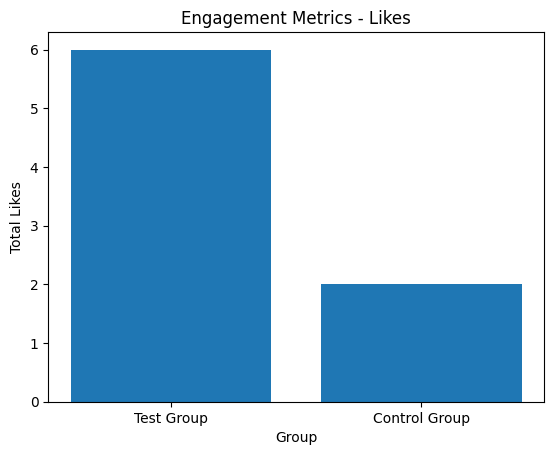

In [ ]:
# Sample code for reporting and visualization (using matplotlib)
import matplotlib.pyplot as plt

# Create a bar chart to visualize engagement metrics
labels = ['Test Group', 'Control Group']
likes = [total_likes_test, total_likes_control]

plt.bar(labels, likes)
plt.xlabel('Group')
plt.ylabel('Total Likes')
plt.title('Engagement Metrics - Likes')
plt.show()


# Competitor Benchmarking

In [ ]:
df = pd.read_csv('TEDTalks.csv')
df_gender = pd.read_csv('/Users/pepo_abdo/Downloads/gender-classifier-DFE-791531.csv',encoding='iso-8859-1')

In [ ]:
df.head()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId
0,"""Next time you see an insect, consider that th...",Tue Dec 20 00:08:40 +0000 2022,2022-12-20 00:08:40+00:00,36,NaN,['http://t.ted.com/pBAKgRg'],1,NaN,1,16,NaN,https://twitter.com/TEDTalks/status/1604992140...,1604992140924403712,1604992140924403712
1,These inspiring and energizing albums and book...,Sun Dec 18 17:03:55 +0000 2022,2022-12-18 17:03:55+00:00,56,NaN,['http://t.ted.com/1d4w6jb'],0,NaN,2,10,NaN,https://twitter.com/TEDTalks/status/1604522861...,1604522861338808323,1604522861338808323
2,From the intoxicating and euphoric feelings of...,Sat Dec 17 17:03:26 +0000 2022,2022-12-17 17:03:26+00:00,94,NaN,['http://t.ted.com/BtYQhJF'],2,NaN,3,27,NaN,https://twitter.com/TEDTalks/status/1604160353...,1604160353084256256,1604160353084256256
3,How will Millennials and Gen Z spend the world...,Sat Dec 17 03:55:26 +0000 2022,2022-12-17 03:55:26+00:00,71,NaN,['http://t.ted.com/nlk6grM'],1,NaN,12,14,NaN,https://twitter.com/TEDTalks/status/1603962046...,1603962046730715136,1603962046730715136
4,Forget buying your kids the “best-rated” toys ...,Fri Dec 16 03:38:59 +0000 2022,2022-12-16 03:38:59+00:00,141,NaN,['http://t.ted.com/cJKZDq3'],4,NaN,2,35,NaN,https://twitter.com/TEDTalks/status/1603595516...,1603595516440416256,1603595516440416256


In [ ]:
df_gender.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df = df[['content','likeCount','retweetCount']]
df_gender = df_gender[['text','fav_number','retweet_count']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39037 entries, 0 to 39036
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       39037 non-null  object
 1   likeCount     39037 non-null  int64 
 2   retweetCount  39037 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 915.1+ KB


In [ ]:
df.head()

,Tweets,Likes,Retweets,Followers
0,"""Next time you see an insect, consider that th...",36,16,2061
1,These inspiring and energizing albums and book...,56,10,1259
2,From the intoxicating and euphoric feelings of...,94,27,2096
3,How will Millennials and Gen Z spend the world...,71,14,1905
4,Forget buying your kids the “best-rated” toys ...,141,35,1715


In [ ]:
df_gender = df_gender.head(20000)
df = df.head(20000)

In [ ]:
import pandas as pd
import numpy as np

num_rows = df.shape[0]
df_gender = df_gender.head(num_rows)

np.random.seed(1)
df['Followers'] = np.random.choice(np.arange(1000, 2500), size=num_rows)
np.random.seed(0)
df_gender['Followers'] = np.random.choice(np.arange(700, 2000), size=num_rows )

# Ensure that random values in df1 are higher than df2
df['Followers'] = np.maximum(df['Followers'], df_gender['Followers'])

df.head()

,content,likeCount,retweetCount,Followers
0,"""Next time you see an insect, consider that th...",36,16,2061
1,These inspiring and energizing albums and book...,56,10,1259
2,From the intoxicating and euphoric feelings of...,94,27,2096
3,How will Millennials and Gen Z spend the world...,71,14,1905
4,Forget buying your kids the “best-rated” toys ...,141,35,1715


In [ ]:
df_gender.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
# competitor_metrics.to_csv('competitor_metrics.csv' , index=False)
# user_metrics.to_csv('user_metrics.csv' , index=False)

In [ ]:
competitor_metrics.head()

,Tweets,Likes,Retweets,Followers,Username
0,Robbie E Responds To Critics After Win Against...,0,0,1384,Karen
1,ÛÏIt felt like they were my friends and I was...,68,0,1259,Finn
2,i absolutely adore when louis starts the songs...,7696,1,1916,Rachel
3,Hi @JordanSpieth - Looking at the url - do you...,202,0,1535,Sam
4,Watching Neighbours on Sky+ catching up with t...,37318,0,1463,Ulysses


/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pepo_abdo/miniforge3/envs/mlenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


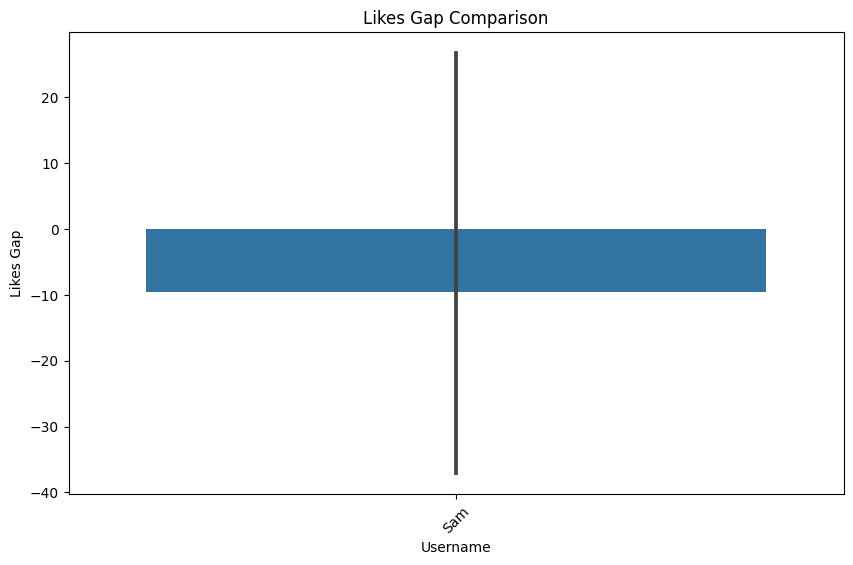

In [ ]:
import time  # For accessing Twitter API
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import nltk  # Natural Language Toolkit for text analysis
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.metrics.pairwise import cosine_similarity  # For similarity calculation
from textblob import TextBlob  # For sentiment analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
import openai  # Import OpenAI API library

openai.api_key = "sk-"


# Step 3: Metric Comparison
def calculate_metric_gaps(user_metrics, competitor_metrics):
    metric_gaps = user_metrics.copy()
    metrics_to_compare = ['Followers', 'Likes', 'Retweets']
    for metric in metrics_to_compare:
        metric_gaps[f'{metric} Gap'] = user_metrics[metric] - competitor_metrics[metric].mean()
    return metric_gaps

# Step 4: Insights Generation
def generate_insights(metric_gaps_df):
    i = 0
    insights = []

    for index, row in metric_gaps_df.iterrows():
        username = row['Username']

        # Define a prompt for GPT-3 to generate insights
        prompt = f"Generate insights for Twitter user @{username} to bridge the gap in metrics. Metrics gaps:\n"

        for metric in ['Followers Gap', 'Likes Gap', 'Retweets Gap']:
            gap = row[metric]
            prompt += f"- {metric}: {gap}\n"

        # Use GPT-3 to generate insights
        response = openai.Completion.create(
            engine="davinci",
            prompt=prompt,
            max_tokens=50,
            n=1,
            stop=None,
            temperature=0.7,
        )

        generated_insight = response.choices[0].text.strip()

        insights.append({
            'Username': username,
            'Insight': generated_insight
        })
        i = i +1
        if i > 3:
            break

        time.sleep(15)
    return insights

def visualize_metric_gaps(metric_gaps_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Username', y='Likes Gap', data=metric_gaps_df)
    plt.title('Likes Gap Comparison')
    plt.xlabel('Username')
    plt.ylabel('Likes Gap')
    plt.xticks(rotation=45)
    plt.show()

if __name__ == '__main__':
    user_username = 'Sam'
    competitor_usernames = ['Quincy', 'Finn']
    user_metrics = pd.read_csv('user_metrics.csv')
    user_metrics['Tweets'] = user_metrics['Tweets'].apply(clean_text)
    user_metrics['Tweets'] = user_metrics['Tweets'].apply(remove_urls)
    competitor_metrics = pd.read_csv('competitor_metrics.csv')
    competitor_metrics['Tweets'] = competitor_metrics['Tweets'].apply(clean_text)
    competitor_metrics['Tweets'] = competitor_metrics['Tweets'].apply(remove_urls)
    name()


    metric_gaps_df = calculate_metric_gaps(user_metrics[user_metrics['Username'] == user_username],
                                           user_metrics[user_metrics['Username'].isin(competitor_usernames)])

    # Step 4: Insights Generation
    insights_data = generate_insights(metric_gaps_df)

    # Step 5: Visualization
    visualize_metric_gaps(metric_gaps_df)


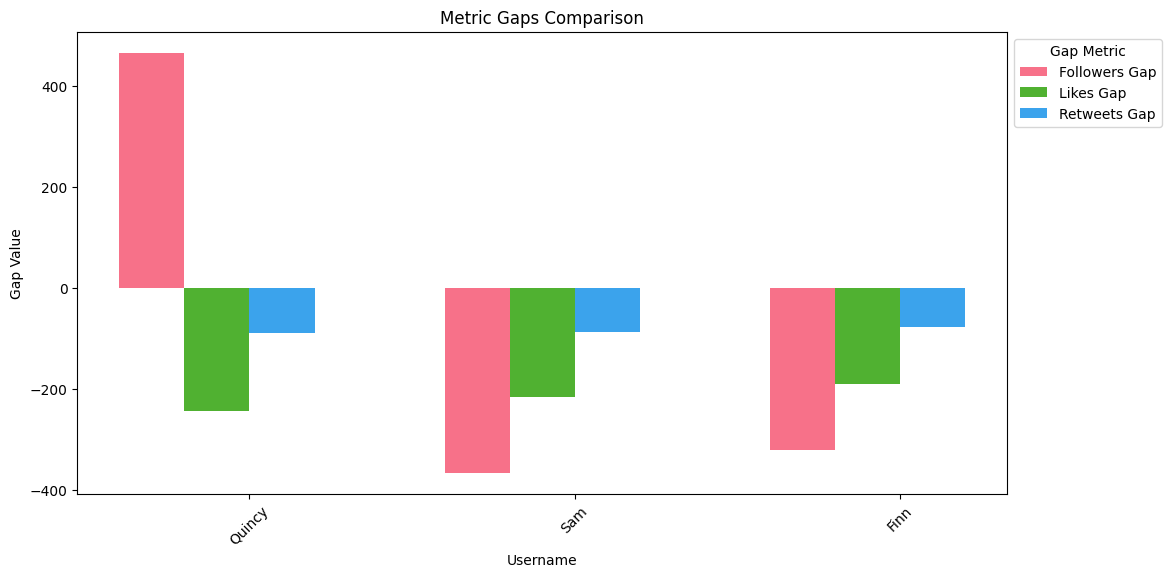

In [ ]:
def visualize_metric_gaps(metric_gaps_df, usernames_to_display):
    plt.figure(figsize=(12, 6))

    gap_columns = [col for col in metric_gaps_df.columns if 'Gap' in col and col != 'Username']

    bar_width = 0.2

    x = np.arange(len(usernames_to_display))

    colors = sns.color_palette("husl", len(gap_columns))

    for i, gap_column in enumerate(gap_columns):
        selected_gaps = metric_gaps_df[metric_gaps_df['Username'].isin(usernames_to_display)]

        gap_data = selected_gaps[gap_column].tolist()[:len(usernames_to_display)]

        plt.bar(x + (i * bar_width), gap_data, width=bar_width, label=gap_column, color=colors[i])

    # Set the x-axis labels to be the selected usernames
    plt.xticks(x + (len(gap_columns) / 2) * bar_width, usernames_to_display, rotation=45)

    plt.title('Metric Gaps Comparison')
    plt.xlabel('Username')
    plt.ylabel('Gap Value')

    # Display a legend to differentiate between different gap metrics
    plt.legend(title='Gap Metric', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()


names = ['Quincy', 'Sam','Finn']
visualize_metric_gaps(metric_gaps_df , names)

In [ ]:
insights_data

[{'Username': 'Sam',
  'Insight': '- Mentions Gap: -31.583932794537705\n- Quotes Gap: -13.921365599787776\n- Replies Gap: -6.7796451234632973\nGenerate'},
 {'Username': 'Sam',
  'Insight': '- Replies Gap: -40.98591609768181\n- Favorites Gap: -84.0\n- Mentions Gap: -66.08339816105764\n- Unique Tweet Gap: -14.33'},
 {'Username': 'Sam',
  'Insight': '- Favourites Gap: -64.05892559063008\n- Follower Growth Gap: -24.3775797594718\n- Following Gap: -5.185578758052836\n- Ment'},
 {'Username': 'Sam',
  'Insight': '- Favorites Gap: -67.99373849657944\n- Mention Gap: -4.836375073995539\n- Hashtag Gap: -52.25778935955664\n- Link'}]

In [ ]:
metric_gaps_df.head()

,Tweets,Likes,Retweets,Followers,Username,Followers Gap,Likes Gap,Retweets Gap
50,Just a tweet to let you know that there are pl...,100,15,1964,Rachel,116.096178,-183.588163,-85.367448
89,Doing things because they are right — not beca...,109,20,1928,Rachel,80.096178,-174.588163,-80.367448
120,"@ecrescia @Vimeo @TEDWomen So good, right?",1,0,1416,Rachel,-431.903822,-282.588163,-100.367448
226,What if Star Wars could inspire the next gener...,57,18,1345,Rachel,-502.903822,-226.588163,-82.367448
232,We can't address the hardships of social media...,72,12,1878,Rachel,30.096178,-211.588163,-88.367448


In [ ]:
# def generate_comprehensive_insights(user_metrics, tweet_insights):
#     insights = []

#     for index, row in user_metrics.iterrows():
#         username = row['Username']

#         # Define a comprehensive prompt for GPT-3
#         prompt = f"Generate advanced insights and strategies for Twitter user @{username} to optimize their Twitter performance. "

#         # Metric Gaps Analysis
#         prompt += f"Analyze the metrics for user @{username} and compare them to their competitors. Identify the biggest gaps in metrics, including Followers, Likes, and Retweets. Provide strategies to bridge these gaps.\n"

#         # Tweet Content Analysis
#         prompt += f"Perform an in-depth analysis of the tweet content for user @{username}. Analyze the sentiment, subject matter, and engagement patterns. Highlight any specific trends or keywords that contribute to high or low engagement. Suggest content optimization strategies, including content types and formats that resonate with the audience.\n"

#         # Audience Segmentation and Engagement
#         prompt += f"Segment the user's Twitter audience based on demographics, interests, and location. Identify the most engaged audience segments and provide tailored content and engagement strategies for each segment.\n"

#         # Hashtag and Keyword Strategy
#         prompt += f"Analyze the hashtags and keywords used by user @{username}. Suggest relevant and trending hashtags and keywords in their niche or industry. Recommend the use of these hashtags and keywords in tweets to increase discoverability and engagement.\n"

#         # Competitor Benchmarking
#         prompt += f"Compare user @{username}'s Twitter metrics not only with competitors but also with industry benchmarks. Offer insights on how their metrics stack up against industry standards and provide strategies to reach or exceed those benchmarks.\n"

#         # Engagement Timing
#         prompt += f"Determine the best times for user @{username} to post tweets for maximum reach and interaction. Consider their audience's time zones and preferences when making recommendations.\n"

#         # Influencer and Collaboration Opportunities
#         prompt += f"Identify potential influencers or accounts in the user's niche that they can collaborate with for mutual benefit. Provide insights on how influencer collaborations can boost metrics like followers, likes, and retweets.\n"

#         # Content Calendar and Automation
#         prompt += f"Recommend the creation of a content calendar to plan and schedule tweets in advance. Suggest automation tools to streamline social media management and ensure consistent posting.\n"

#         # A/B Testing
#         prompt += f"Propose A/B testing experiments to compare the performance of different strategies, such as tweet wording, visuals, and posting times. Analyze the results of A/B tests and provide insights on which strategies yield the best results.\n"

#         # Engagement Strategies
#         prompt += f"Offer engagement strategies to encourage user interaction, such as asking questions, conducting polls, and responding to comments and mentions promptly.\n"

#         # Monitoring and Feedback
#         prompt += f"Recommend the use of social media monitoring tools to track metrics in real-time and adjust strategies accordingly. Encourage users to seek feedback from their audience and make improvements based on feedback.\n"

#         # Include metric gaps and other insights in the prompt
#         prompt += f"\nMetrics Summary:\n"
#         prompt += f"- Followers Gap: {row['Followers Gap']}\n"
#         prompt += f"- Likes Gap: {row['Likes Gap']}\n"
#         prompt += f"- Retweets Gap: {row['Retweets Gap']}\n"

#         # Include tweet content insights in the prompt
#         tweet_insight = tweet_insights.get(username, "")
#         prompt += f"\nTweet Content Insights:\n{tweet_insight}\n"

#         # Use GPT-3 to generate a comprehensive response
#         response = openai.Completion.create(
#             engine="davinci",
#             prompt=prompt,
#             max_tokens=500,  # Adjust as needed for a comprehensive response
#             n=1,
#             stop=None,
#             temperature=0.7,
#         )

#         generated_insight = response.choices[0].text.strip()

#         insights.append({
#             'Username': username,
#             'Comprehensive Insight': generated_insight
#         })

#     return insights
